In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
np.random.seed(2019)
tf.set_random_seed(2019)

%matplotlib inline
print(tf.__version__)

1.14.0


## Utils functions

In [2]:
def generate_data(a, b, train_set_ratio=0.5):
    # Generate data around line y = ax + b
    x = np.arange(-10, 10, 0.2)
    y = a * x + b + 5 * np.random.rand(len(x))

    data_size = len(x)
    x_train = x[: int(data_size * train_set_ratio)]
    y_train = y[: int(data_size * train_set_ratio)]
    x_test = x[int(data_size * (1 - train_set_ratio)):]
    y_test = y[int(data_size * (1 - train_set_ratio)):]

    return x_train, y_train, x_test, y_test


def visualize_data(x, y, viz_trainining=False):
    # Plot data using matplotlib
    plt.plot(x, y, 'bo')
    plt.ylabel('Output Value')
    plt.xlabel('Input Feature')
    if viz_trainining:
        plt.title('Normalized data\tClick on the figure to run Gradient Descent Algorithm')
        plt.waitforbuttonpress()
    else:
        plt.title('Original data')
        plt.show()


def normalize_feature(X, mode, mean=None, std=None):
    if mode == 'train':
        mean = X.mean()
        std = X.std()
        X_norm = (X - mean) / std

        return X_norm, mean, std

    elif mode == 'test':
        assert mean is not None and std is not None
        X_norm = (X - mean) / std
        return X_norm

    else:
        raise NotImplementedError
        
def draw_model(a, b):
    # Draw line y = ax + b
    x = np.arange(-3, 3, 0.2)
    y = a * x + b
    plt.plot(x, y)

## Define model

In [4]:
def define_parameters():
    # TODO 1: Initialize parameters of model named: 'a' and 'b'
    a = tf.Variable(tf.random_normal(shape=()), dtype=tf.float32, name='a')
    b = tf.Variable(tf.random_normal(shape=()), dtype=tf.float32, name='b')
    return a, b

def define_cost_func(X, Y, a, b, n_sample):
    # TODO 2: define hypothesis 'h' and cost function cost 'cost'
    y_hat = a*X + b
    cost = tf.reduce_sum(tf.pow(y_hat - Y, 2)/(2*n_sample))
    return cost

def define_optimizer(l_rate, cost_func):
    # TODO 3: define optimizer and initializer
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=l_rate).minimize(cost_func)
    initializer = tf.global_variables_initializer()
    return optimizer, initializer
    

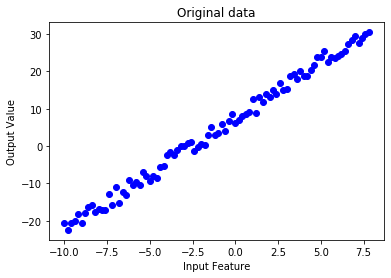

In [5]:
# Step 1: Generate and visualize training data
X_train, Y_train, X_test, Y_test = generate_data(3, 5, train_set_ratio=0.9)
visualize_data(X_train, Y_train)
n_samples = len(X_train)

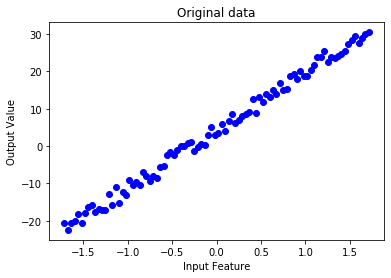

In [6]:
# Step 1b: Normalize Xs and re-visualize training data
X_train, mean_train, std_train = normalize_feature(X_train, mode='train')
X_test = normalize_feature(X_test, mode='test',
                           mean=mean_train, std=std_train)
visualize_data(X_train, Y_train)

In [7]:
# Step 2: Initialize Placeholders for input data
X = tf.placeholder(shape=[None], dtype=tf.float32, name='X')
Y = tf.placeholder(shape=[None], dtype=tf.float32, name='Y')

In [8]:
# Step 3: Build up your model graph
a_sym, b_sym, = define_parameters()
cost = define_cost_func(X, Y, a_sym, b_sym, n_samples)

In [10]:
# Step 4: Create optimizer op and initializer op
learning_rate = 0.03
optimizer, initializer = define_optimizer(learning_rate, cost)

print("mean_train = {} \nstd_train = {}".format(mean_train, std_train))

mean_train = -1.1000000000000314 
std_train = 5.195831662656757


## Train model

Step 0: ----------------------------------------------
	a= 2.0672517 b= 1.3769118
	Training Cost = 99.70816 	Testing Cost = 125.269516


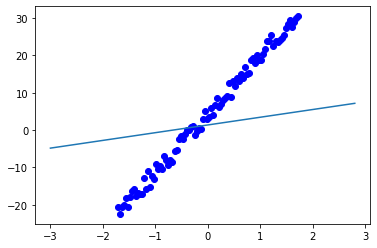

Step 1: ----------------------------------------------
	a= 2.466966 b= 1.4638797
	Training Cost = 93.86889 	Testing Cost = 117.98175


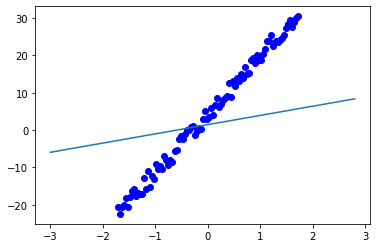

Step 2: ----------------------------------------------
	a= 2.8546886 b= 1.5482386
	Training Cost = 88.374725 	Testing Cost = 111.122925


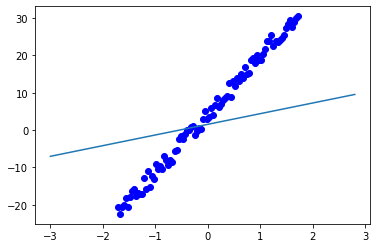

Step 3: ----------------------------------------------
	a= 3.23078 b= 1.6300668
	Training Cost = 83.20528 	Testing Cost = 104.66773


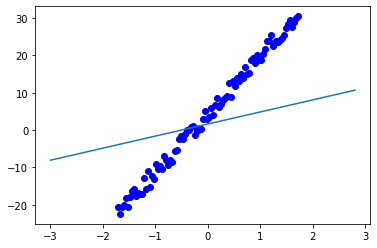

Step 4: ----------------------------------------------
	a= 3.5955882 b= 1.70944
	Training Cost = 78.341324 	Testing Cost = 98.59239


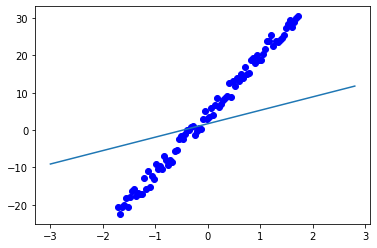

Step 5: ----------------------------------------------
	a= 3.9494524 b= 1.786432
	Training Cost = 73.76485 	Testing Cost = 92.87449


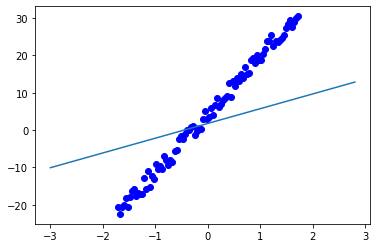

Step 6: ----------------------------------------------
	a= 4.292701 b= 1.8611143
	Training Cost = 69.45883 	Testing Cost = 87.492935


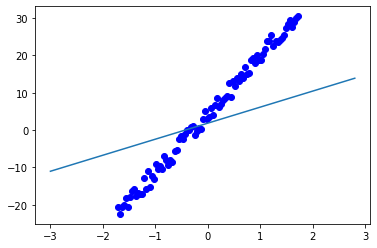

Step 7: ----------------------------------------------
	a= 4.6256514 b= 1.9335561
	Training Cost = 65.4073 	Testing Cost = 82.427925


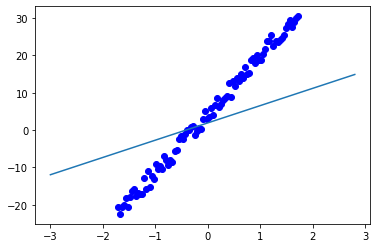

Step 8: ----------------------------------------------
	a= 4.9486136 b= 2.0038247
	Training Cost = 61.595222 	Testing Cost = 77.66078


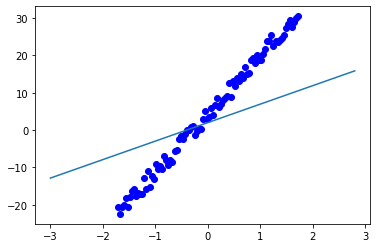

Step 9: ----------------------------------------------
	a= 5.261887 b= 2.0719852
	Training Cost = 58.008434 	Testing Cost = 73.17396


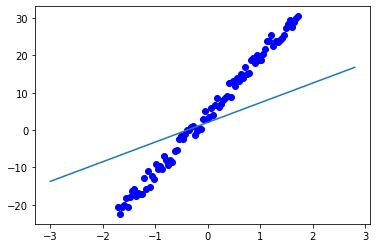

Step 10: ----------------------------------------------
	a= 5.565762 b= 2.1381009
	Training Cost = 54.63362 	Testing Cost = 68.95091


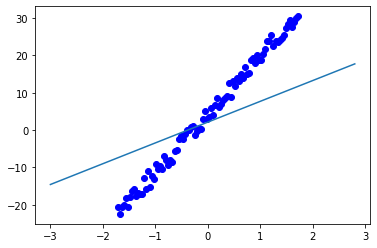

Step 11: ----------------------------------------------
	a= 5.860521 b= 2.202233
	Training Cost = 51.45827 	Testing Cost = 64.976105


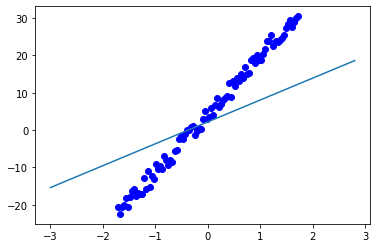

Step 12: ----------------------------------------------
	a= 6.146437 b= 2.2644413
	Training Cost = 48.47058 	Testing Cost = 61.234905


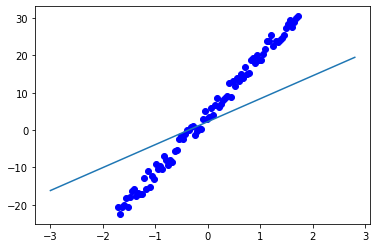

Step 13: ----------------------------------------------
	a= 6.4237757 b= 2.3247833
	Training Cost = 45.65945 	Testing Cost = 57.71355


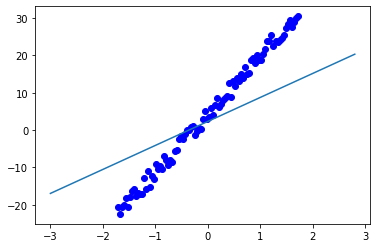

Step 14: ----------------------------------------------
	a= 6.6927943 b= 2.383315
	Training Cost = 43.014473 	Testing Cost = 54.399075


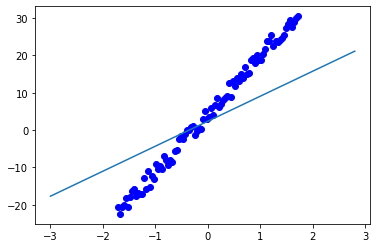

Step 15: ----------------------------------------------
	a= 6.9537425 b= 2.440091
	Training Cost = 40.5258 	Testing Cost = 51.279297


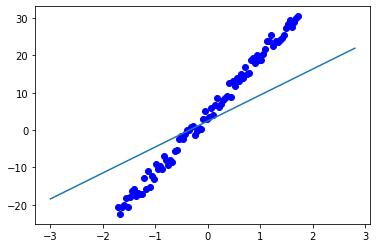

Step 16: ----------------------------------------------
	a= 7.206862 b= 2.4951634
	Training Cost = 38.18421 	Testing Cost = 48.342743


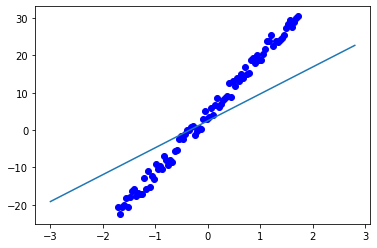

Step 17: ----------------------------------------------
	a= 7.452388 b= 2.5485837
	Training Cost = 35.981018 	Testing Cost = 45.57863


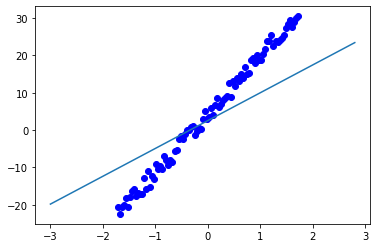

Step 18: ----------------------------------------------
	a= 7.690548 b= 2.6004014
	Training Cost = 33.908028 	Testing Cost = 42.97678


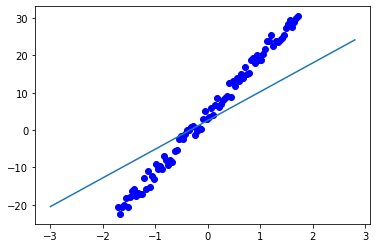

Step 19: ----------------------------------------------
	a= 7.921563 b= 2.6506646
	Training Cost = 31.957554 	Testing Cost = 40.52765


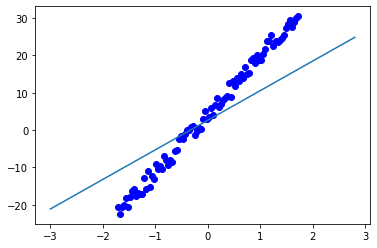

Step 20: ----------------------------------------------
	a= 8.145648 b= 2.69942
	Training Cost = 30.122353 	Testing Cost = 38.222237


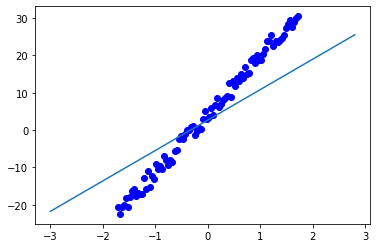

Step 21: ----------------------------------------------
	a= 8.36301 b= 2.7467127
	Training Cost = 28.39561 	Testing Cost = 36.05209


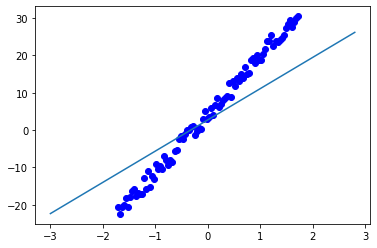

Step 22: ----------------------------------------------
	a= 8.573852 b= 2.7925866
	Training Cost = 26.77092 	Testing Cost = 34.00924


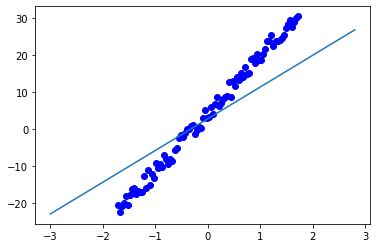

Step 23: ----------------------------------------------
	a= 8.778368 b= 2.8370843
	Training Cost = 25.242249 	Testing Cost = 32.08618


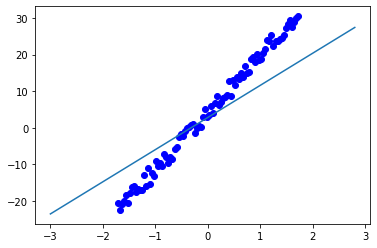

Step 24: ----------------------------------------------
	a= 8.976748 b= 2.880247
	Training Cost = 23.80392 	Testing Cost = 30.275877


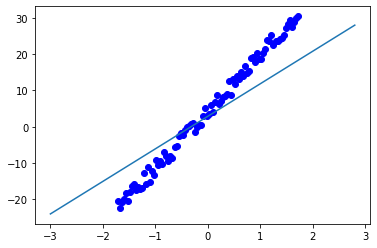

Step 25: ----------------------------------------------
	a= 9.169178 b= 2.9221148
	Training Cost = 22.4506 	Testing Cost = 28.571682


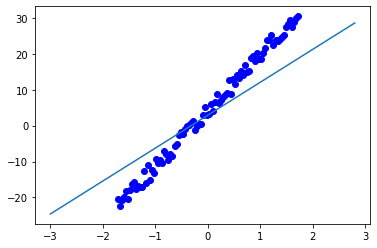

Step 26: ----------------------------------------------
	a= 9.355834 b= 2.9627266
	Training Cost = 21.177258 	Testing Cost = 26.967358


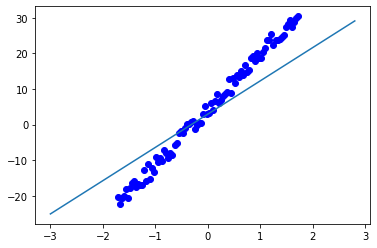

Step 27: ----------------------------------------------
	a= 9.536891 b= 3.00212
	Training Cost = 19.979174 	Testing Cost = 25.457018


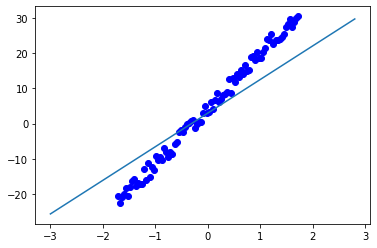

Step 28: ----------------------------------------------
	a= 9.712516 b= 3.0403316
	Training Cost = 18.85189 	Testing Cost = 24.035147


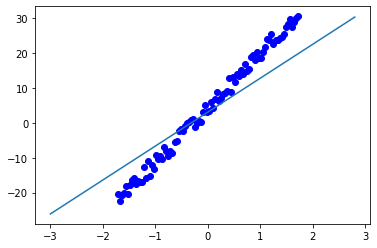

Step 29: ----------------------------------------------
	a= 9.882873 b= 3.0773969
	Training Cost = 17.791237 	Testing Cost = 22.69652


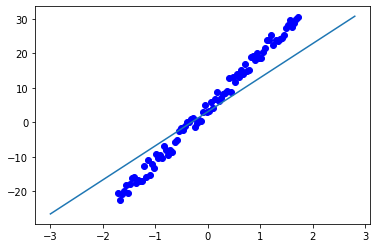

Step 30: ----------------------------------------------
	a= 10.048119 b= 3.1133502
	Training Cost = 16.79326 	Testing Cost = 21.436256


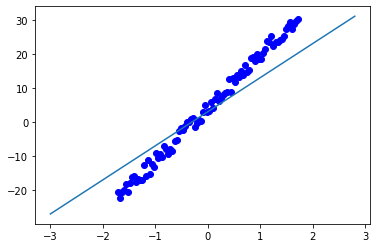

Step 31: ----------------------------------------------
	a= 10.208406 b= 3.1482248
	Training Cost = 15.854264 	Testing Cost = 20.249748


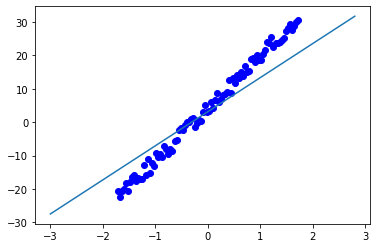

Step 32: ----------------------------------------------
	a= 10.363886 b= 3.1820533
	Training Cost = 14.97077 	Testing Cost = 19.132656


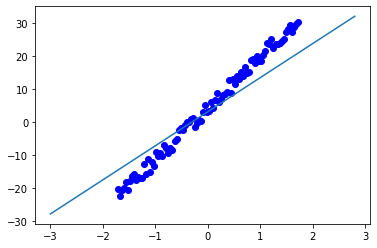

Step 33: ----------------------------------------------
	a= 10.514701 b= 3.2148669
	Training Cost = 14.139489 	Testing Cost = 18.080893


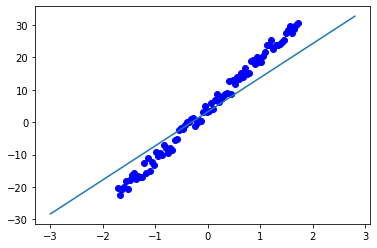

Step 34: ----------------------------------------------
	a= 10.660992 b= 3.2466962
	Training Cost = 13.357335 	Testing Cost = 17.09062


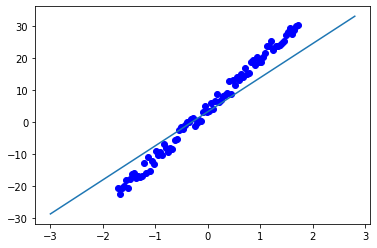

Step 35: ----------------------------------------------
	a= 10.802894 b= 3.2775707
	Training Cost = 12.621405 	Testing Cost = 16.158226


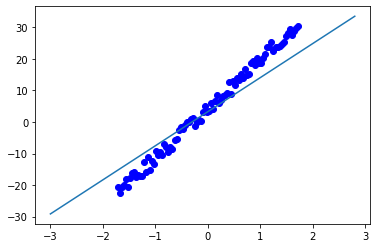

Step 36: ----------------------------------------------
	a= 10.940538 b= 3.307519
	Training Cost = 11.928969 	Testing Cost = 15.280311


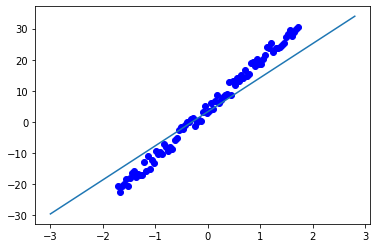

Step 37: ----------------------------------------------
	a= 11.074054 b= 3.3365686
	Training Cost = 11.277458 	Testing Cost = 14.453672


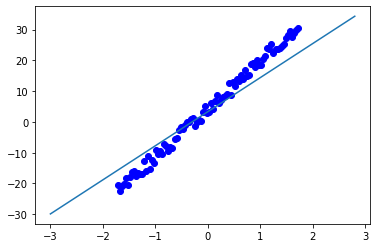

Step 38: ----------------------------------------------
	a= 11.203564 b= 3.3647468
	Training Cost = 10.66445 	Testing Cost = 13.6753


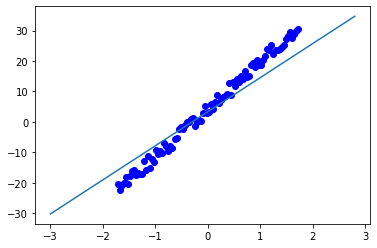

Step 39: ----------------------------------------------
	a= 11.329188 b= 3.3920796
	Training Cost = 10.087671 	Testing Cost = 12.942352


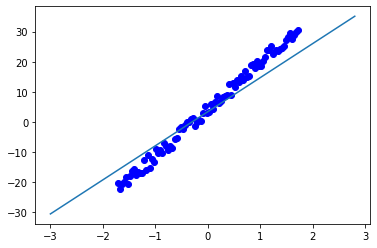

Step 40: ----------------------------------------------
	a= 11.451044 b= 3.4185925
	Training Cost = 9.544979 	Testing Cost = 12.25217


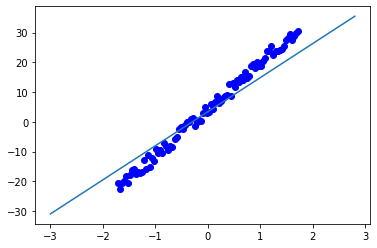

Step 41: ----------------------------------------------
	a= 11.569244 b= 3.44431
	Training Cost = 9.034362 	Testing Cost = 11.602238


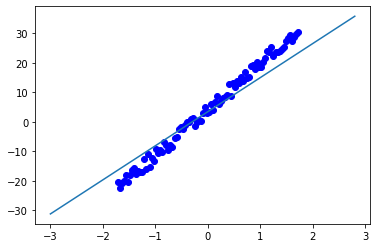

Step 42: ----------------------------------------------
	a= 11.683899 b= 3.469256
	Training Cost = 8.553923 	Testing Cost = 10.990192


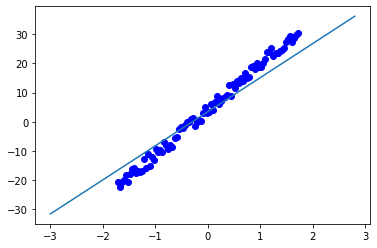

Step 43: ----------------------------------------------
	a= 11.795114 b= 3.4934535
	Training Cost = 8.101873 	Testing Cost = 10.413811


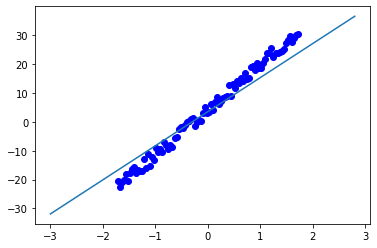

Step 44: ----------------------------------------------
	a= 11.902992 b= 3.516925
	Training Cost = 7.6765428 	Testing Cost = 9.870999


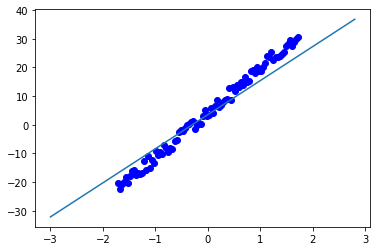

Step 45: ----------------------------------------------
	a= 12.007634 b= 3.5396926
	Training Cost = 7.276346 	Testing Cost = 9.3597975


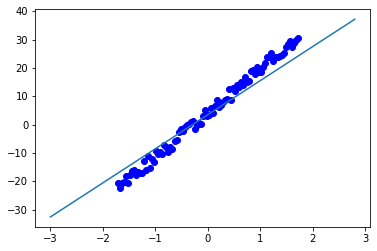

Step 46: ----------------------------------------------
	a= 12.109137 b= 3.561777
	Training Cost = 6.899805 	Testing Cost = 8.878342


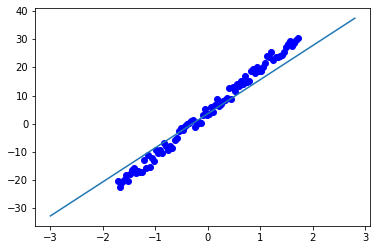

Step 47: ----------------------------------------------
	a= 12.207594 b= 3.583199
	Training Cost = 6.5455165 	Testing Cost = 8.424893


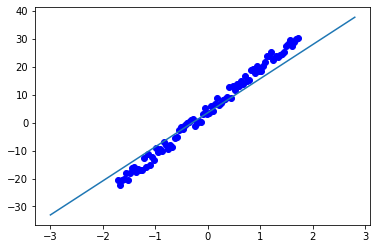

Step 48: ----------------------------------------------
	a= 12.303098 b= 3.6039784
	Training Cost = 6.212167 	Testing Cost = 7.9978046


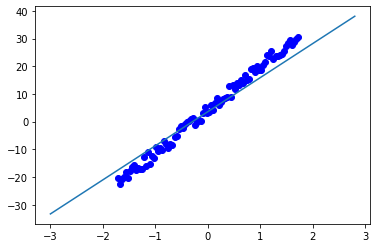

Step 49: ----------------------------------------------
	a= 12.395737 b= 3.6241343
	Training Cost = 5.8985167 	Testing Cost = 7.5955377


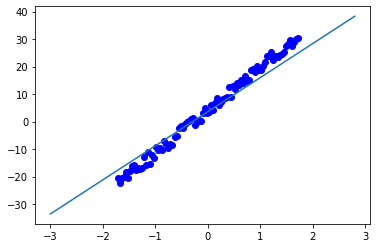

Step 50: ----------------------------------------------
	a= 12.485597 b= 3.6436856
	Training Cost = 5.603404 	Testing Cost = 7.2166305


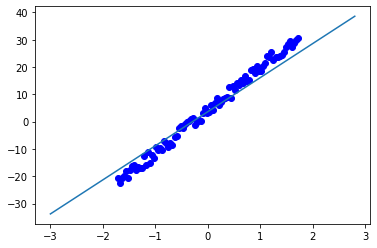

Step 51: ----------------------------------------------
	a= 12.572761 b= 3.6626503
	Training Cost = 5.3257303 	Testing Cost = 6.8597226


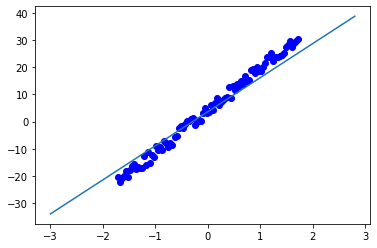

Step 52: ----------------------------------------------
	a= 12.65731 b= 3.681046
	Training Cost = 5.0644684 	Testing Cost = 6.523524


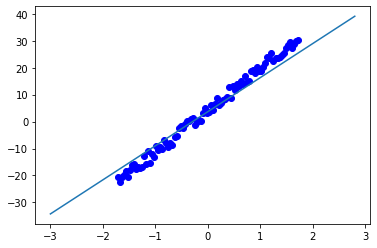

Step 53: ----------------------------------------------
	a= 12.739322 b= 3.69889
	Training Cost = 4.8186483 	Testing Cost = 6.206819


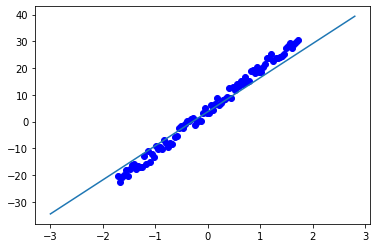

Step 54: ----------------------------------------------
	a= 12.818873 b= 3.7161984
	Training Cost = 4.587356 	Testing Cost = 5.9084716


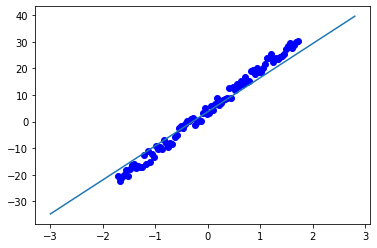

Step 55: ----------------------------------------------
	a= 12.896039 b= 3.7329876
	Training Cost = 4.3697343 	Testing Cost = 5.6274


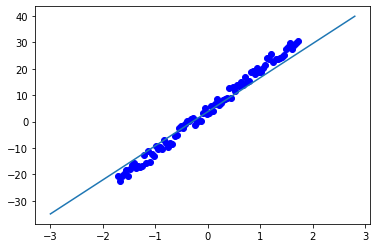

Step 56: ----------------------------------------------
	a= 12.97089 b= 3.7492733
	Training Cost = 4.164972 	Testing Cost = 5.3626003


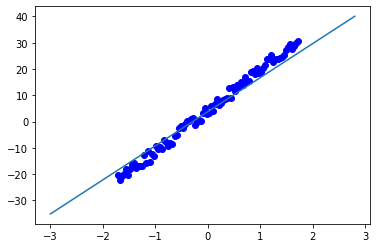

Step 57: ----------------------------------------------
	a= 13.043495 b= 3.7650704
	Training Cost = 3.9723103 	Testing Cost = 5.1131206


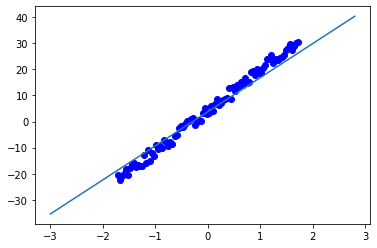

Step 58: ----------------------------------------------
	a= 13.113922 b= 3.7803936
	Training Cost = 3.7910361 	Testing Cost = 4.8780622


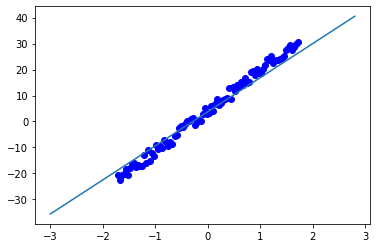

Step 59: ----------------------------------------------
	a= 13.182237 b= 3.795257
	Training Cost = 3.6204748 	Testing Cost = 4.6565833


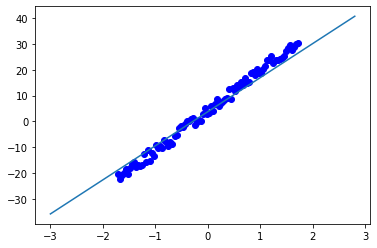

Step 60: ----------------------------------------------
	a= 13.248502 b= 3.8096747
	Training Cost = 3.459993 	Testing Cost = 4.447892


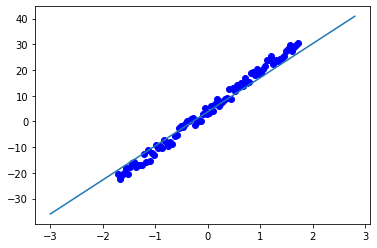

Step 61: ----------------------------------------------
	a= 13.312778 b= 3.8236597
	Training Cost = 3.3089952 	Testing Cost = 4.2512436


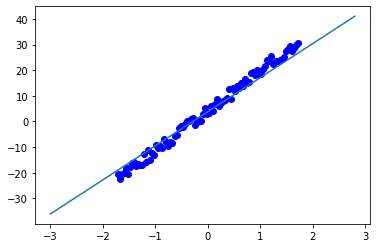

Step 62: ----------------------------------------------
	a= 13.375127 b= 3.8372252
	Training Cost = 3.166923 	Testing Cost = 4.0659328


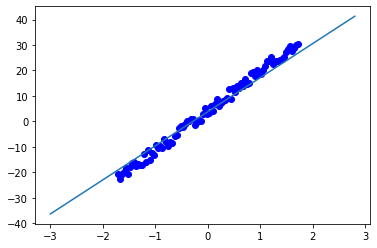

Step 63: ----------------------------------------------
	a= 13.435605 b= 3.8503838
	Training Cost = 3.0332475 	Testing Cost = 3.891297


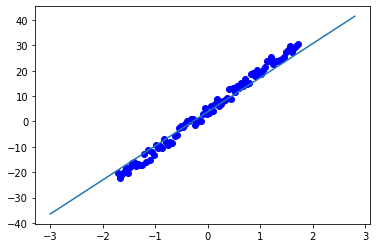

Step 64: ----------------------------------------------
	a= 13.494268 b= 3.8631475
	Training Cost = 2.9074712 	Testing Cost = 3.7267163


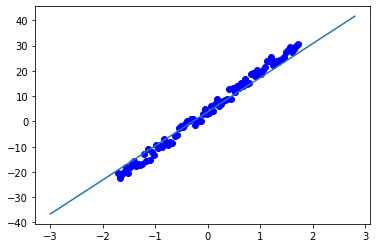

Step 65: ----------------------------------------------
	a= 13.551172 b= 3.8755283
	Training Cost = 2.7891297 	Testing Cost = 3.5716019


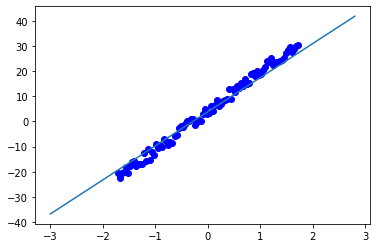

Step 66: ----------------------------------------------
	a= 13.606369 b= 3.8875377
	Training Cost = 2.6777809 	Testing Cost = 3.4254038


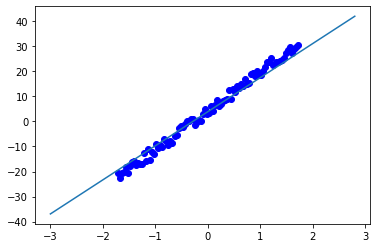

Step 67: ----------------------------------------------
	a= 13.65991 b= 3.8991868
	Training Cost = 2.5730133 	Testing Cost = 3.287599


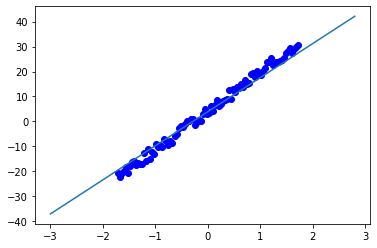

Step 68: ----------------------------------------------
	a= 13.711844 b= 3.9104865
	Training Cost = 2.4744363 	Testing Cost = 3.1577053


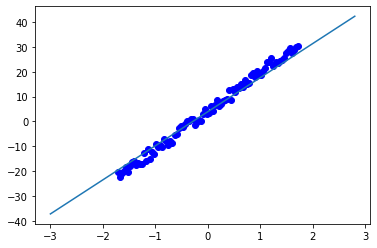

Step 69: ----------------------------------------------
	a= 13.762221 b= 3.921447
	Training Cost = 2.3816867 	Testing Cost = 3.035256


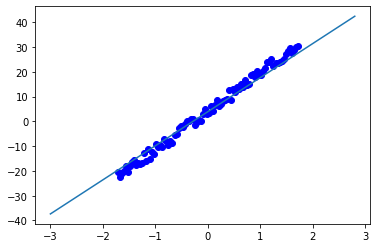

Step 70: ----------------------------------------------
	a= 13.811087 b= 3.9320788
	Training Cost = 2.2944174 	Testing Cost = 2.9198222


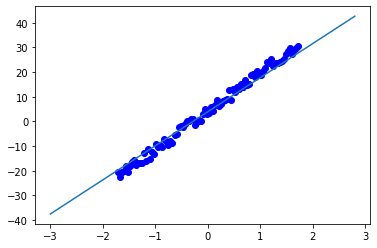

Step 71: ----------------------------------------------
	a= 13.858486 b= 3.9423916
	Training Cost = 2.2123065 	Testing Cost = 2.8109934


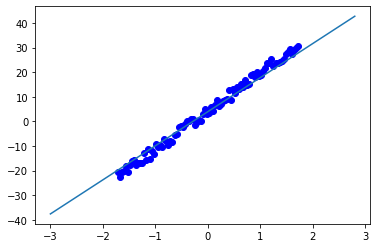

Step 72: ----------------------------------------------
	a= 13.904464 b= 3.9523952
	Training Cost = 2.1350474 	Testing Cost = 2.7083886


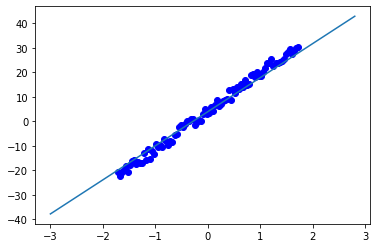

Step 73: ----------------------------------------------
	a= 13.949061 b= 3.9620986
	Training Cost = 2.0623555 	Testing Cost = 2.6116436


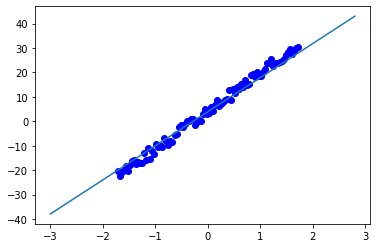

Step 74: ----------------------------------------------
	a= 13.992321 b= 3.971511
	Training Cost = 1.9939595 	Testing Cost = 2.52042


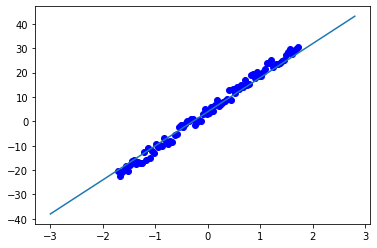

Step 75: ----------------------------------------------
	a= 14.034284 b= 3.980641
	Training Cost = 1.9296061 	Testing Cost = 2.434395


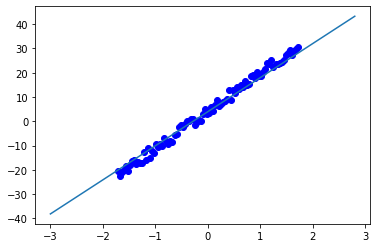

Step 76: ----------------------------------------------
	a= 14.074986 b= 3.989497
	Training Cost = 1.869055 	Testing Cost = 2.35327


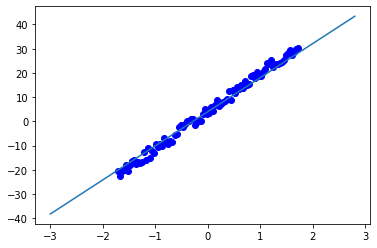

Step 77: ----------------------------------------------
	a= 14.114469 b= 3.9980874
	Training Cost = 1.8120838 	Testing Cost = 2.2767587


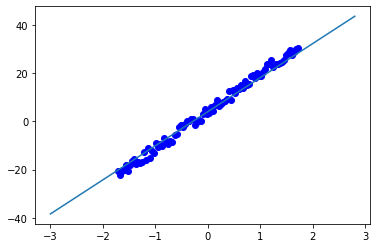

Step 78: ----------------------------------------------
	a= 14.152766 b= 4.00642
	Training Cost = 1.7584786 	Testing Cost = 2.2045944


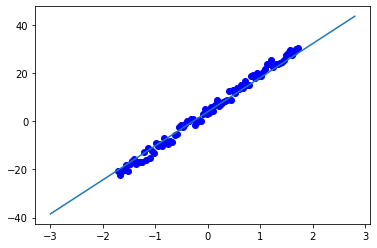

Step 79: ----------------------------------------------
	a= 14.189915 b= 4.014503
	Training Cost = 1.7080421 	Testing Cost = 2.1365263


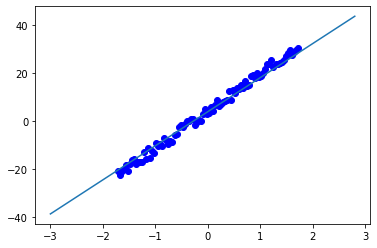

Step 80: ----------------------------------------------
	a= 14.225949 b= 4.022343
	Training Cost = 1.6605861 	Testing Cost = 2.0723162


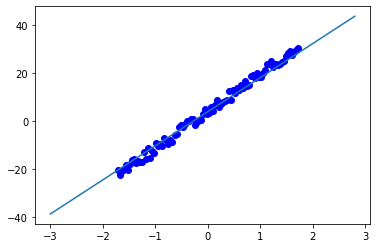

Step 81: ----------------------------------------------
	a= 14.260902 b= 4.029948
	Training Cost = 1.6159346 	Testing Cost = 2.011742


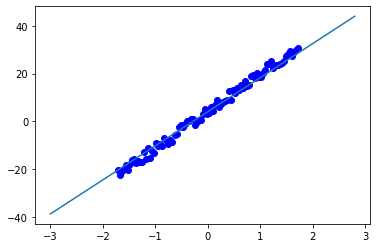

Step 82: ----------------------------------------------
	a= 14.294807 b= 4.037325
	Training Cost = 1.573922 	Testing Cost = 1.9545925


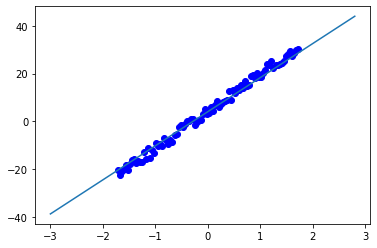

Step 83: ----------------------------------------------
	a= 14.327695 b= 4.0444803
	Training Cost = 1.5343922 	Testing Cost = 1.9006715


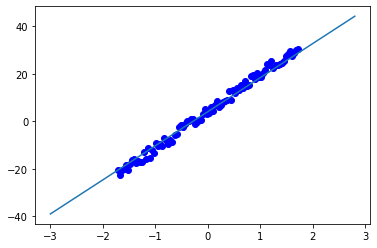

Step 84: ----------------------------------------------
	a= 14.359596 b= 4.051421
	Training Cost = 1.497199 	Testing Cost = 1.8497906


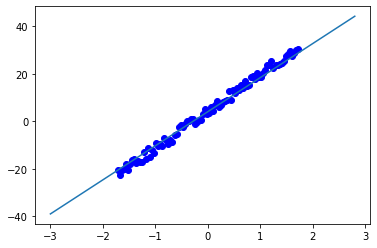

Step 85: ----------------------------------------------
	a= 14.39054 b= 4.0581536
	Training Cost = 1.4622033 	Testing Cost = 1.8017768


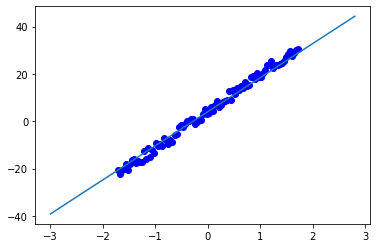

Step 86: ----------------------------------------------
	a= 14.420556 b= 4.0646844
	Training Cost = 1.4292763 	Testing Cost = 1.7564629


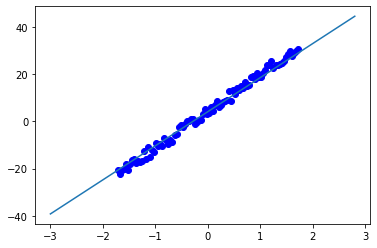

Step 87: ----------------------------------------------
	a= 14.449671 b= 4.071019
	Training Cost = 1.3982949 	Testing Cost = 1.7136953


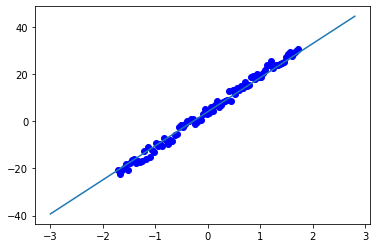

Step 88: ----------------------------------------------
	a= 14.477913 b= 4.0771637
	Training Cost = 1.3691452 	Testing Cost = 1.6733259


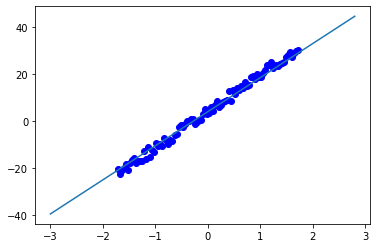

Step 89: ----------------------------------------------
	a= 14.505307 b= 4.083124
	Training Cost = 1.3417175 	Testing Cost = 1.6352175


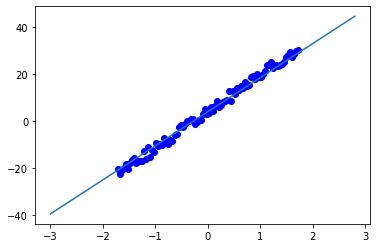

Step 90: ----------------------------------------------
	a= 14.531879 b= 4.088906
	Training Cost = 1.3159113 	Testing Cost = 1.5992408


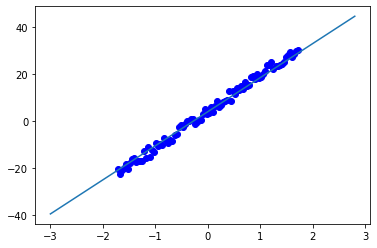

Step 91: ----------------------------------------------
	a= 14.557654 b= 4.094514
	Training Cost = 1.2916304 	Testing Cost = 1.565273


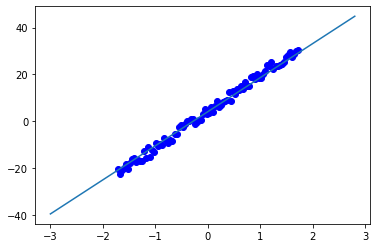

Step 92: ----------------------------------------------
	a= 14.582657 b= 4.0999537
	Training Cost = 1.2687848 	Testing Cost = 1.533198


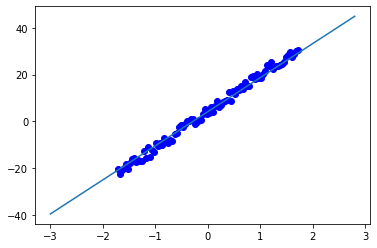

Step 93: ----------------------------------------------
	a= 14.606909 b= 4.1052303
	Training Cost = 1.2472883 	Testing Cost = 1.5029083


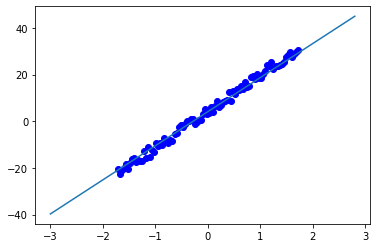

Step 94: ----------------------------------------------
	a= 14.630433 b= 4.1103487
	Training Cost = 1.227063 	Testing Cost = 1.4743016


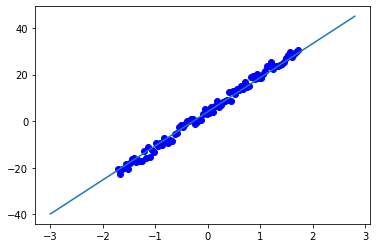

Step 95: ----------------------------------------------
	a= 14.653252 b= 4.1153135
	Training Cost = 1.2080328 	Testing Cost = 1.4472815


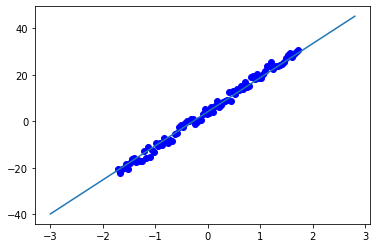

Step 96: ----------------------------------------------
	a= 14.675385 b= 4.1201296
	Training Cost = 1.1901275 	Testing Cost = 1.4217577


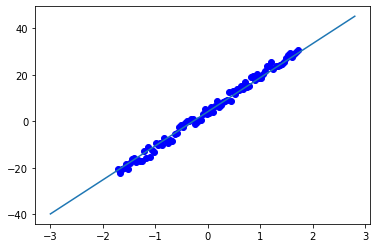

Step 97: ----------------------------------------------
	a= 14.696856 b= 4.124801
	Training Cost = 1.1732805 	Testing Cost = 1.3976439


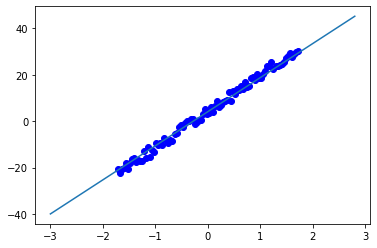

Step 98: ----------------------------------------------
	a= 14.717682 b= 4.1293325
	Training Cost = 1.1574289 	Testing Cost = 1.3748603


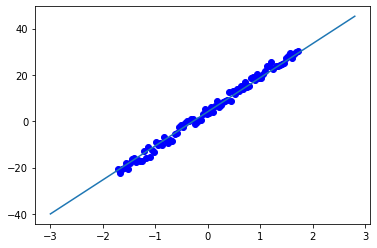

Step 99: ----------------------------------------------
	a= 14.737884 b= 4.133728
	Training Cost = 1.142514 	Testing Cost = 1.3533307


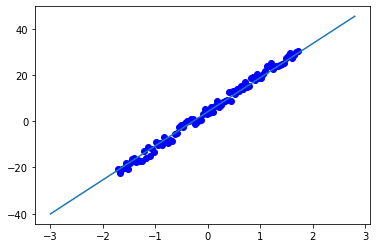

Optimized variable: a =  14.737884
Optimized variable: b =  4.133728


In [13]:
with tf.Session() as sess:
    sess.run(initializer)
    for i in range(100):
        _, cost_train = sess.run([optimizer, cost], feed_dict={X: X_train, Y: Y_train})
        a, b = sess.run([a_sym, b_sym])
        cost_test = sess.run(cost, feed_dict={X: X_test, Y: Y_test})
        print("Step {}: ----------------------------------------------".format(i))
        print('\ta=', a, 'b=', b)
        print('\tTraining Cost =', cost_train, "\tTesting Cost =", cost_test)
        plt.plot(X_train, Y_train, 'bo')
        draw_model(a, b)
        plt.pause(0.1)

print('Optimized variable: a = ', a)
print('Optimized variable: b = ', b)